# Задача 1 - вариант 4

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def f(x, y):
    return x * np.exp(- x ** 2 - y ** 2)
    
def f_grad(x, y):
    dx = np.exp(- x ** 2 - y ** 2) * (1 - 2 * x ** 2)
    dy = - 2 * x * y * np.exp(- x ** 2 - y ** 2)
    return dx, dy

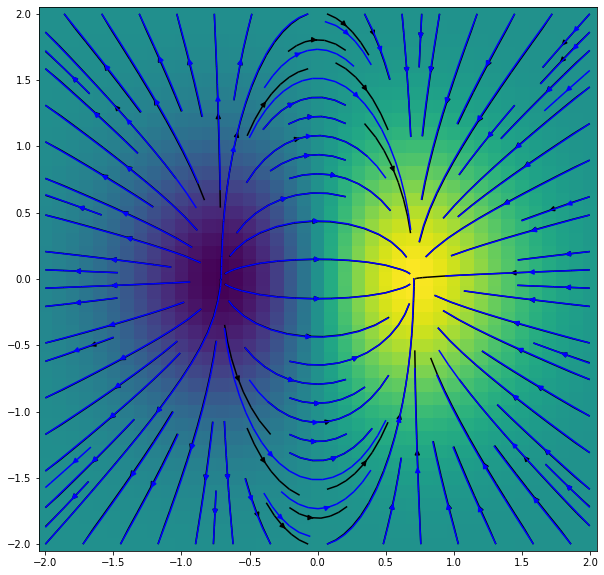

In [74]:
plt.figure(figsize=(10, 10))

x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
X, Y = np.meshgrid(x, y)
V, U = np.gradient(f(X, Y), x, y)
U_r, V_r = f_grad(X, Y)

plt.pcolormesh(X, Y,f(X, Y))
plt.streamplot(X, Y, U, V, color="black")
plt.streamplot(X, Y, U_r, V_r, color="blue")

чёрным показан численно вычисленый градиент, синем аналитически вычисленный

In [80]:
u_err = np.linalg.norm(U - U_r)
v_err = np.linalg.norm(V - V_r)
uv_err = np.linalg.norm([u_err, v_err])
u_norm = np.linalg.norm(U)
v_norm = np.linalg.norm(V)
uv_norm = np.linalg.norm([U, V])
print(u_err)
print(f"Интегральная ошибка = {uv_err:.3e}, относительная ошибка = {uv_err / uv_norm:.3e}")

0.14390280305752362
Интегральная ошибка = 1.535e-01, относительная ошибка = 1.235e-02


U[:5, :5]

In [76]:
U_r[:5, :5]

array([[-0.00234824, -0.00308183, -0.00393087, -0.00486563, -0.00583345],
       [-0.0034683 , -0.00455181, -0.00580582, -0.00718644, -0.00861589],
       [-0.00502118, -0.00658981, -0.00840528, -0.01040406, -0.01247353],
       [-0.0071254 , -0.00935139, -0.01192766, -0.01476406, -0.01770078],
       [-0.0099112 , -0.01300749, -0.016591  , -0.02053634, -0.02462121]])

In [77]:
(U_r - U)[:5, :5]

array([[ 3.56474358e-04,  1.93446022e-05,  1.44165475e-05,
         5.65168183e-06, -7.31075338e-06],
       [ 5.26505780e-04,  2.85716060e-05,  2.12929638e-05,
         8.34742552e-06, -1.07978423e-05],
       [ 7.62240642e-04,  4.13641029e-05,  3.08265608e-05,
         1.20848569e-05, -1.56324101e-05],
       [ 1.08167096e-03,  5.86984562e-05,  4.37449720e-05,
         1.71492282e-05, -2.21834459e-05],
       [ 1.50456983e-03,  8.16476817e-05,  6.08478618e-05,
         2.38540299e-05, -3.08564662e-05]])

# Задача 2 - вариант 3

0.0888888888888888


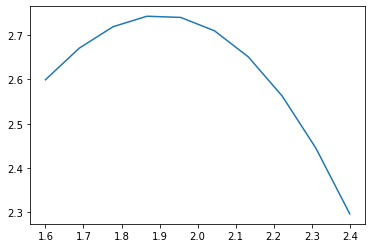

In [106]:
def g(x):
    return (x + 1) * np.sin(x)

x = np.linspace(1.6, 2.4, 10)
print(x[1] -  x[0])
plt.plot(x, g(x))

In [103]:
def rectangle_integral(f, x):
    h = x[1] - x[0]
    return np.sum(f(x[:-1])) * h

def trapz_integral(f, x):
    h = x[1] - x[0]
    return np.sum(h * (f(x[:-1]) + f(x[1:])) / 2)

def simpson_integral(f, x):
    h = x[1] - x[0]
    return h * np.sum(f(x[2::2]) + 4 * f(x[1:-1:2]) + f(x[:-2:2])) / 3
    # return h/3. * (f(x[0]) + 4 * sum(f(x[1:-1:2])) + 2 * sum(f(x[2:-2:2])) + f(x[-1]))

In [104]:
print(rectangle_integral(g, x))
print(trapz_integral(g, x))
print(simpson_integral(g, x))

2.118731239227619
2.1052949479372187
1.8961767081553116


g(0) = (x + 1) sin x  
g(1) = sin x + (x + 1) cos x  
g(2) = 2 cos x - (x + 1) sin x  
g(3) = - 3 sin x - (x + 1) cos x  
g(4) = - 4 cos x + (x + 1) sin x  

1.6 < x < 2.4  

максимум второй производной M_2 = 2.3  
максимум четвертой производой M_4 = 5.25  

погрешность метода трепеций (2.4 - 1.6) * h^2 / 12 * M_2 = 0.8 * 0.089 ^ 2 *  2.3 / 12 = 0.0012  
погрешность метода Симпсона (2.4 - 1.6) * (2h)^4 / 180 * M_4 = 0.8 * (2 * 0.089) ^ 4 *  5.25 / 180 = 0.0002  

рассчёт погрешности неточный так как при десяти точках интеграл методом Симпсона значительно отличается от дей

In [109]:
print(simpson_integral(g, np.linspace(1.6, 2.4, 100))) # более точный интеграл симпсона

2.088491800181634


In [111]:
# абсолютные ошибки методов
integral = 2.10711 # тоное значение интеграла
print(np.abs(integral - rectangle_integral(g, x)))
print(np.abs(integral - trapz_integral(g, x)))
print(np.abs(integral - simpson_integral(g, x)))

0.01162123922761893
0.0018150520627813194
0.21093329184468845


In [113]:
N_trapz = 0
N_simps = 0

for i in range(2, 1000):
    x = np.linspace(1.6, 2.4, i)
    if np.abs(integral - trapz_integral(g, x)) < 0.01:
        N_trapz = i
        break
        
for i in range(2, 1000, 2):
    
    x = np.linspace(1.6, 2.4, i)
    if np.abs(integral - simpson_integral(g, x)) < 0.01:
        N_simps = i
        break
        
print(N_trapz, N_simps)

5 186


Для трапеций достаточной 5 разбиений для точноности  
Для Симпсона оказалось нужно 186

# Задача 3 - вариант 4

In [198]:
def integral_f(x, y, z):
    return x * y * z

N = 10000


print("Значение интеграла:", integral)

Значение интеграла: 0.16806089963994195


In [199]:
# интеграл в декартовых координатах
def integral_1(N, integral_f):
    count = 0
    integral_sum = 0

    for _ in range(10 * N):
        r_1 = np.random.uniform(low=0, high=1, size=3)
        if np.linalg.norm(r_1) <= 1:
            count += 1
            x, y, z = r_1[0], r_1[1], r_1[2]
            integral_sum += integral_f(x, y, z)

            if count == N:
                break

    delta_volume = np.pi / 6 / N
    integral = integral_sum * delta_volume
    return integral

for i in range(1, 7):
    print(f"N = {10 ** i}, integral = {integral_1(10 ** i, integral_f)}")

N = 10, integral = 0.01235082875491405
N = 100, integral = 0.020601095230759748
N = 1000, integral = 0.021526692180631614
N = 10000, integral = 0.021097486790108266
N = 100000, integral = 0.020975901107437696
N = 1000000, integral = 0.020843452676687076


In [194]:
# интеграл в сферических координатах
def integral_2(N, integral_f):
    count = 0
    integral_sum = 0
    
    for _ in range(N):
        r = np.random.uniform(low=0, high=1)
        theta = np.random.uniform(low=0, high=np.pi/2)
        phi = np.random.uniform(low=0, high=np.pi/2)
        
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)
        
        jacobian = r ** 2 * np.sin(theta)
        
        integral_sum += integral_f(x, y, z) * jacobian
        
    delta_volume = (np.pi / 2) * (np.pi / 2) / N
    integral = integral_sum * delta_volume
    return integral

for i in range(1, 7):
    print(f"N = {10 ** i}, integral = {integral_2(10 ** i, integral_f)}")

N = 10, integral = 0.015347034868299393
N = 100, integral = 0.014647943504724101
N = 1000, integral = 0.019317334131735746
N = 10000, integral = 0.02073208959285896
N = 100000, integral = 0.020587415089309235
N = 1000000, integral = 0.020805863847636833


Аналитическое решение интеграла = 1/48 = 0.0208334

Оценка погрешности по ЦПТ:

In [205]:
samples = 100
for i in range(1, 6):
    vals_1 = np.array([integral_1(10 ** i, integral_f) for _ in range(samples)])
    print(f"N = {10 ** i}, среднее = {np.mean(vals_1)}, погрешность = {np.std(vals_1)}")

N = 10, среднее = 0.01994536499859797, погрешность = 0.006164895043049389
N = 100, среднее = 0.020699859029352105, погрешность = 0.002016244907560679
N = 1000, среднее = 0.020886582208013663, погрешность = 0.000623343189020856
N = 10000, среднее = 0.020855072556430647, погрешность = 0.00018080287369749668
N = 100000, среднее = 0.020830871972821588, погрешность = 5.5504950984182504e-05


In [208]:
real_integral = 1 / 48

samples = 10
for i in range(1, 6):
    vals_1 = np.array([integral_1(10 ** i, integral_f) - real_integral for _ in range(samples)])
    print(f"N = {10 ** i}, максимальная погрешность методом 1 = {np.max(np.abs(vals_1))}")
    vals_2 = np.array([integral_2(10 ** i, integral_f) - real_integral for _ in range(samples)])
    print(f"N = {10 ** i}, максимальная погрешность методом 2 = {np.max(np.abs(vals_2))}")

N = 10, максимальная погрешность методом 1 = 0.017897267477455066
N = 10, максимальная погрешность методом 2 = 0.029584141305951123
N = 100, максимальная погрешность методом 1 = 0.004072378632924346
N = 100, максимальная погрешность методом 2 = 0.009946102104659004
N = 1000, максимальная погрешность методом 1 = 0.0007362901183705847
N = 1000, максимальная погрешность методом 2 = 0.0026246189435175163
N = 10000, максимальная погрешность методом 1 = 0.00020817493775833473
N = 10000, максимальная погрешность методом 2 = 0.000877863079034355
N = 100000, максимальная погрешность методом 1 = 0.00017151590342930761
N = 100000, максимальная погрешность методом 2 = 0.00019820717244163968


Видим, что у второго метода погрешность больше чем у первого поэтому первый метод предпочтительнее